In [2]:
#importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
#data collection
wine_data=pd.read_csv("/content/winequality-red.csv")
wine_data.shape

(1599, 12)

In [4]:
#checking for missing values
wine_data.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


Data Analysis and Prediction

In [5]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


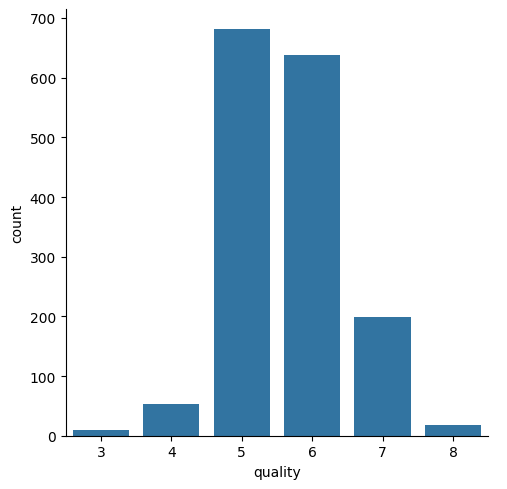

In [10]:
sns.catplot(data=wine_data,x="quality",kind="count")

In [11]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<Axes: xlabel='quality', ylabel='volatile acidity'>

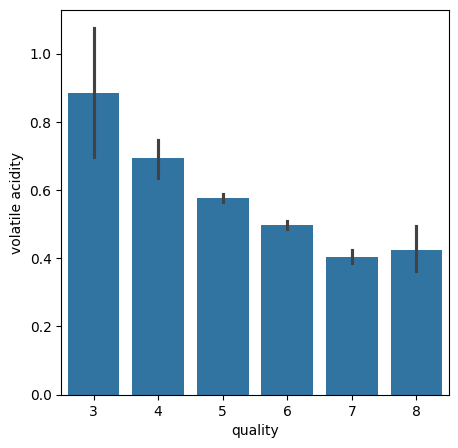

In [16]:
#volatile acidity vs quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x="quality",y="volatile acidity",data=wine_data)

# Correlation
1.positive
2.negative

<Axes: >

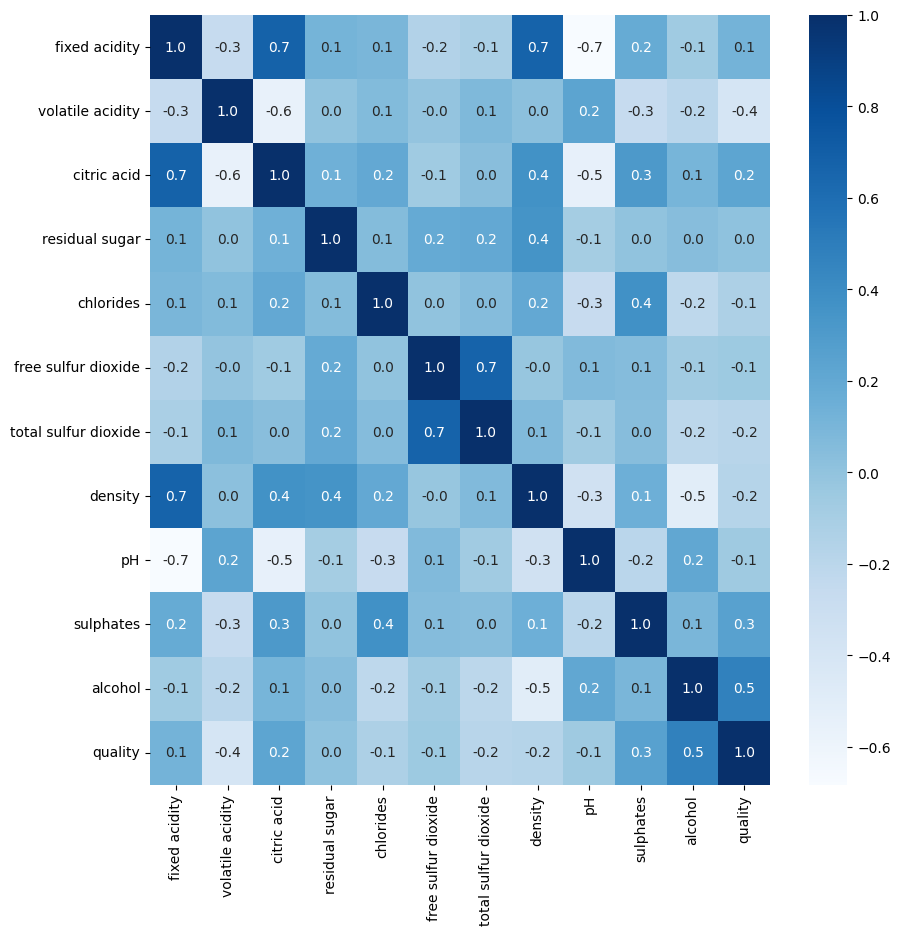

In [21]:
#constructing a heatmap
corralted=wine_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corralted,annot=True,cmap="Blues",fmt=".1f")

Data Preprocessing

In [40]:
x=wine_data.drop(columns="quality",axis=1)


Label Binarization

In [36]:
y=wine_data["quality"].apply(lambda y:1 if y>=7 else 0)
y.value_counts()


,count
quality,
0,1382
1,217


Test/Train Splitting

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

Model Training: Random Forest Classifier

In [48]:
classifier=RandomForestClassifier()
acc=accuracy_score
classifier.fit(x_train,y_train)


RandomForestClassifier()

In [44]:
x_train_out=classifier.predict(x_train)

In [49]:
train_acc=acc(x_train_out,y_train)
train_acc

1.0

In [51]:
x_test_out=classifier.predict(x_test)
test_acc=acc(x_test_out,y_test)
test_acc

0.934375

Building a Predictive System


In [62]:
input_data=np.asarray((7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4))
input=input_data.reshape(1,-1)
input

array([[ 7.4   ,  0.7   ,  0.    ,  1.9   ,  0.076 , 11.    , 34.    ,
         0.9978,  3.51  ,  0.56  ,  9.4   ]])

In [63]:
output=classifier.predict(input)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [64]:
if output[0]==1:
  print("good quality")
else:
  print("bad quality")

bad quality
